In [52]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
data = pd.read_csv('train.csv')
data1 = data[['MSZoning','SalePrice','GarageArea']]       

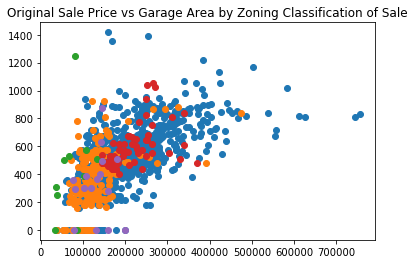

In [53]:
k = len(data1['MSZoning'].unique())
for i in data1['MSZoning'].unique():
    # select only the applicable rows
    ds = data1[data1['MSZoning'] == i]
    # plot the points
    plt.plot(ds[['SalePrice']],ds[['GarageArea']],'o')
plt.title("Original Sale Price vs Garage Area by Zoning Classification of Sale")
plt.show()

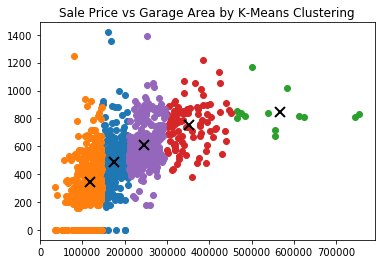

In [54]:
from sklearn import cluster
del data1['MSZoning']
kmeans = cluster.KMeans(n_clusters=k, n_init=100, max_iter=50000000, algorithm='auto')
kmeans.fit(data1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

for i in range(k):
    # select only data observations from the applicable cluster
    yr = data1.iloc[np.where(labels==i)]
    # plot the data observations
    plt.plot(yr['SalePrice'],yr['GarageArea'],'o')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=10.0)
    plt.setp(lines,mew=2.0)
plt.title("Sale Price vs Garage Area by K-Means Clustering")
plt.show()
